In [37]:
#import required libraries
import pandas as pd
import numpy as np
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [38]:
#specify the columns to use
cols_use = ['Date', 'Hour', 'DA_DEMD', 'DryBulb', 'DewPnt', 'DA_LMP', 'Day']

In [39]:
#functions for converting string to datetime objects

def convert_string_to_datetime(string):
    datetime_obj = datetime.strptime(string, "%d-%b-%y")
    return datetime_obj.date()

#format is different for 2012,2013,2014
def convert_string_to_datetime2(string):
    datetime_obj = datetime.strptime(string, "%m/%d/%Y")
    return datetime_obj.date()

#format is different for 2015
def convert_string_to_datetime3(string):
    datetime_obj = datetime.strptime(string, "%d/%m/%Y")
    return datetime_obj.date()

#format for natural Gas prices
def convert_string_to_datetime4(string):
    datetime_obj = datetime.strptime(string, "%Y-%m-%d")
    return datetime_obj.date()

In [40]:
#2012-15 dataset
data1 = pd.read_csv('loadData1.csv', usecols=cols_use, skiprows=range(1415,1439))
data2 = pd.read_csv('loadData2.csv', usecols=cols_use)
data3 = pd.read_csv('loadData3.csv', usecols=cols_use)
data4 = pd.read_csv('loadData4.csv', usecols=cols_use)

In [41]:
tot_data = data1.append([data2], ignore_index=True)

In [42]:
tot_data['Date'] = tot_data['Date'].apply(convert_string_to_datetime2)
tot_data['Date'] = pd.to_datetime(tot_data['Date'])

In [43]:
#function to get day from date
def get_day_from_date(date_time_obj):
    return int(date_time_obj.date().day)

#function to get month from date
def get_month_from_date(date_time_obj):
    return int(date_time_obj.date().month)

In [45]:
tot_data['Day_Date'] = tot_data['Date'].apply(get_day_from_date)

In [46]:
tot_data

Date  Hour  DA_DEMD  DA_LMP  DryBulb  DewPnt  Day  Day_Date
0     2012-01-01     1  10711.0   35.12       35      33    1         1
1     2012-01-01     2  10276.0   33.38       35      33    1         1
2     2012-01-01     3   9868.0   30.26       36      33    1         1
3     2012-01-01     4   9771.0   28.88       36      33    1         1
4     2012-01-01     5   9884.0   20.23       36      33    1         1
5     2012-01-01     6  10010.0   20.26       35      32    1         1
6     2012-01-01     7  10328.0   30.72       36      33    1         1
7     2012-01-01     8  10715.0   34.16       34      32    1         1
8     2012-01-01     9  11651.0   37.40       35      33    1         1
9     2012-01-01    10  13111.0   38.62       39      35    1         1
10    2012-01-01    11  13140.0   41.18       42      37    1         1
11    2012-01-01    12  13280.0   42.04       45      38    1         1
12    2012-01-01    13  13125.0   40.23       47      38    1         1
13    2012-01-01    14  12935.0   37.69       48      38    1         1
14    2012-01-01    15  12727.0   36.39       50      36    1         1
15    2012-01-01    16  12817.0   38.50       49      37    1         1
16    2012-01-01    17  14128.0   49.36       47      36    1         1
17    2012-01-01    18  15044.0   65.56       46      37    1         1
18    2012-01-01    19  14689.0   56.59       45      39    1         1
19    2012-01-01    20  14263.0   46.38       45      39    1         1
20    2012-01-01    21  13951.0   45.00       45      40    1         1
21    2012-01-01    22  13162.0   38.43       45      41    1         1
22    2012-01-01    23  12098.0   38.00       46      43    1         1
23    2012-01-01    24  11119.0   38.12       46      44    1         1
24    2012-01-02     1  10453.0   30.36       47      44    2         2
25    2012-01-02     2  10447.0   30.95       47      44    2         2
26    2012-01-02     3  10446.0   24.05       47      44    2         2
27    2012-01-02     4  10374.0   20.49       46      42    2         2
28    2012-01-02     5  10473.0   20.46       43      37    2         2
29    2012-01-02     6  10745.0   31.03       40      33    2         2
...          ...   ...      ...     ...      ...     ...  ...       ...
17490 2013-12-30    19  17973.0  125.06       24       8    2        30
17491 2013-12-30    20  17642.0   99.11       22       8    2        30
17492 2013-12-30    21  17137.0  100.30       21       6    2        30
17493 2013-12-30    22  16254.0   86.99       19       5    2        30
17494 2013-12-30    23  14994.0   75.09       17       5    2        30
17495 2013-12-30    24  14002.0   57.15       16       4    2        30
17496 2013-12-31     1  13085.0   94.13       15       3    3        31
17497 2013-12-31     2  13054.0   90.18       13       3    3        31
17498 2013-12-31     3  12979.0   90.04       13       2    3        31
17499 2013-12-31     4  13029.0   90.08       12       1    3        31
17500 2013-12-31     5  12932.0   91.01       12       1    3        31
17501 2013-12-31     6  13226.0  110.62       12       0    3        31
17502 2013-12-31     7  14956.0  165.43       12       0    3        31
17503 2013-12-31     8  16055.0  172.46       11       1    3        31
17504 2013-12-31     9  16394.0  183.69       11       1    3        31
17505 2013-12-31    10  16669.0  189.12       13       1    3        31
17506 2013-12-31    11  16806.0  194.94       15       0    3        31
17507 2013-12-31    12  16653.0  197.45       17       1    3        31
17508 2013-12-31    13  16446.0  185.09       19       2    3        31
17509 2013-12-31    14  16141.0  179.25       21       5    3        31
17510 2013-12-31    15  15918.0  167.28       22       6    3        31
17511 2013-12-31    16  16079.0  175.00       23       8    3        31
17512 2013-12-31    17  17590.0  196.93       23      10    3        31
17513 2013-12-31    18  18439.0  253.00       22    

#### Add Target Labels - Next Day Data

In [47]:
tot_data_labels = list(tot_data['DA_LMP'][24:])

for i in data3['DA_LMP'][0:24]:
    tot_data_labels.append(i)

In [48]:
tot_data['TARGET_DA_LMP'] = tot_data_labels

#### Add Previous Week Next Day Data

In [49]:
#da-lmp prev week
prev_week_da_lmp = list(tot_data['DA_LMP'][24:-168])

#da-demd prev week
prev_week_da_demd = list(tot_data['DA_DEMD'][24:-168])

tot_data = tot_data[168:-24]
tot_data = tot_data.reset_index(drop=True)

tot_data['Prev_Week_DA_DEMD'] = prev_week_da_demd
tot_data['Prev_Week_DA_LMP'] = prev_week_da_lmp

In [50]:
len(tot_data)

17328

#### Add daily means to the data

In [51]:
mean_values = tot_data.groupby('Date', as_index=False).mean()[['Date','DA_DEMD', 'DA_LMP', 'DryBulb', 'DewPnt']]
temp = pd.merge(tot_data, mean_values, how='inner', left_on='Date', right_on='Date', 
                suffixes=('_actual_value','_daily_mean'))
tot_data = temp

#### Split data to train and test set

In [52]:
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler

In [53]:
#X = tot_data[tot_data.columns[tot_data.columns != 'TARGET_DA_LMP']]
#Y = pd.DataFrame(tot_data['TARGET_DA_LMP'])

#when dividing 23 days train and 7 days test use this and comment out the above lines:
X = tot_data

for i in range(len(X['TARGET_DA_LMP'])):
    if(X['TARGET_DA_LMP'][i] < 1):
        X['TARGET_DA_LMP'][i] = (X['TARGET_DA_LMP'][i-1]+X['TARGET_DA_LMP'][i+1])/2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


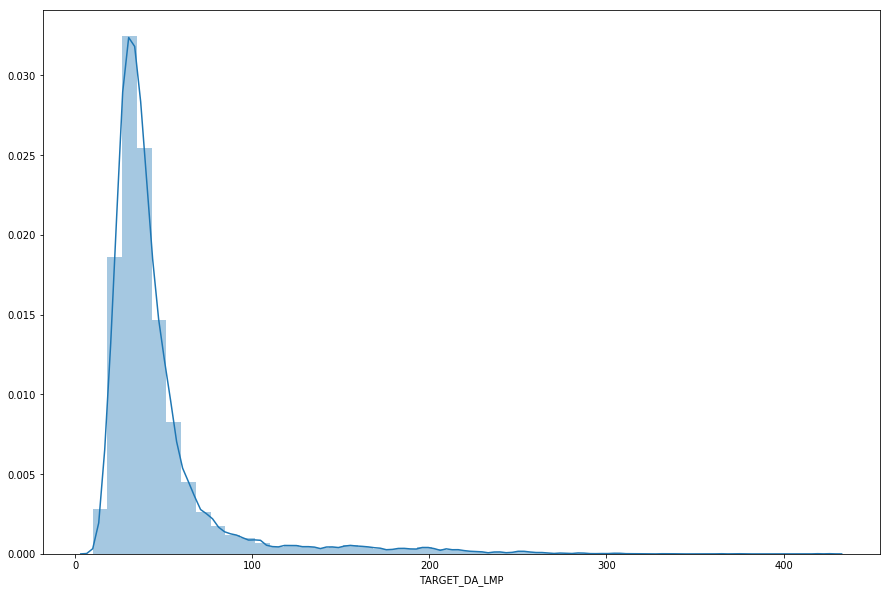

In [54]:
sns.distplot(X['TARGET_DA_LMP'])

#### Split into training and test sets

In [55]:
#split - 23 days training for each month and remaining test data
train = X[X['Day_Date']<24]
test = X[X['Day_Date']>=24]
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [56]:
len(test)

4248

train=X[:-744]
test=X[len(X)-744:]
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

#### Add crude oil prices

In [57]:
crude_oil = pd.read_csv('CurdeOil.csv', delimiter='\t')
crude_oil = crude_oil[::-1]
crude_oil = crude_oil.reset_index(drop=True)
crude_oil = crude_oil[2:]
crude_oil = crude_oil.reset_index(drop=True)

In [58]:
def get_num_from_vol_str(string):
    match = re.search(r"(\d+)", string)
    if match!=None:
        return float(match.group(1))

In [59]:
crude_oil = crude_oil[['Date', 'Price', 'Vol.']]
crude_oil['Date'] = crude_oil['Date'].apply(convert_string_to_datetime)
crude_oil['Date'] = pd.to_datetime(crude_oil['Date'])

crude_oil['Crude_Oil_Price'] = crude_oil['Price']
crude_oil['Crude_Oil_Vol'] = crude_oil['Vol.']

crude_oil = crude_oil.drop('Price', axis=1)
crude_oil = crude_oil.drop('Vol.', axis=1)

In [60]:
temp = pd.merge(train, crude_oil, how='outer', left_on='Date', right_on='Date', suffixes=('_X','_crude_oil'))
temp.reset_index(drop=True)
temp['Crude_Oil_Price'] = temp['Crude_Oil_Price'].fillna(method='bfill')
temp['Crude_Oil_Vol'] = temp['Crude_Oil_Vol'].fillna(method='bfill')
train = temp[0:13080]

train['Crude_Oil_Vol'] = train['Crude_Oil_Vol'].apply(get_num_from_vol_str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [61]:
temp2 = pd.merge(test, crude_oil, how='outer', left_on='Date', right_on='Date', suffixes=('_X','_crude_oil'))
temp2.reset_index(drop=True)
temp2['Crude_Oil_Price'] = temp2['Crude_Oil_Price'].fillna(method='bfill')
temp2['Crude_Oil_Vol'] = temp2['Crude_Oil_Vol'].fillna(method='bfill')
test = temp2[0:4248]

test['Crude_Oil_Vol'] = test['Crude_Oil_Vol'].apply(get_num_from_vol_str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### Add Natural Oil Prices

In [62]:
natural_gas = pd.read_csv('natural_gas.csv', sep=',')
natural_gas = natural_gas[::-1]
natural_gas = natural_gas.reset_index(drop=True)
natural_gas = natural_gas[2:]
natural_gas = natural_gas.reset_index(drop=True)

In [63]:
natural_gas = natural_gas[['Date', 'Settle']]
#natural_gas['Date'] = natural_gas['Date'].apply(convert_string_to_datetime4)
natural_gas['Date'] = pd.to_datetime(natural_gas['Date'])
natural_gas['Natural_Gas_Price'] = natural_gas['Settle']
natural_gas = natural_gas.drop('Settle', axis=1)

In [67]:
temp = pd.merge(train, natural_gas, how='outer', left_on='Date', right_on='Date', suffixes=('_X','_Natural_Gas'))
temp.reset_index(drop=True)
temp['Natural_Gas_Price'] = temp['Natural_Gas_Price'].fillna(method='bfill')
train = temp[0:19704]

KeyError: 'Natural_Gas_Price'

In [68]:
temp2 = pd.merge(test, natural_gas, how='outer', left_on='Date', right_on='Date', suffixes=('_X','_natural_gas'))
temp2.reset_index(drop=True)
temp2['Natural_Gas_Price'] = temp2['Natural_Gas_Price'].fillna(method='bfill')
test = temp2[0:6384]

#### Use specific cols

In [69]:
conditions = [x for x in train.columns if 'Date' 
              not in x and 'TARGET_DA_LMP' not in x and 'DewPnt' not in x 
              and 'DryBulb_actual_value' not in x]
test_conditions = [x for x in train.columns if 'Date' 
              not in x and 'TARGET_DA_LMP' not in x and 'DewPnt' not in x 
              and 'DryBulb' not in x and 'Prev_Week_DA_DEMD' not in x 
                  and 'DA_DEMD_daily_mean' not in x and 'DA_LMP_daily_mean' not in x 
                  ]
conditions2 = [x for x in train.columns if 'Date' not in x and 'LMP' not in x and 'TARGET_DA_DEMD' not in x]

train_x = train[conditions]
train_y = pd.DataFrame(train['TARGET_DA_LMP'])
test_x = test[conditions]
test_y = pd.DataFrame(test['TARGET_DA_LMP'])

In [70]:
train_x

Hour  DA_DEMD_actual_value  DA_LMP_actual_value  Day  \
0       1.0               11369.0                29.58  1.0   
1       2.0               10877.0                27.82  1.0   
2       3.0               10789.0                26.69  1.0   
3       4.0               10887.0                27.71  1.0   
4       5.0               10895.0                27.00  1.0   
5       6.0               10955.0                27.58  1.0   
6       7.0               11528.0                28.62  1.0   
7       8.0               12106.0                28.94  1.0   
8       9.0               13308.0                30.92  1.0   
9      10.0               13668.0                31.09  1.0   
10     11.0               13947.0                30.78  1.0   
11     12.0               14036.0                30.72  1.0   
12     13.0               13843.0                29.79  1.0   
13     14.0               13516.0                28.25  1.0   
14     15.0               13458.0                28.09  1.0   
15     16.0               13687.0                29.21  1.0   
16     17.0               15590.0                34.33  1.0   
17     18.0               16617.0                47.66  1.0   
18     19.0               16129.0                42.16  1.0   
19     20.0               15946.0                36.91  1.0   
20     21.0               15327.0                34.74  1.0   
21     22.0               14370.0                31.14  1.0   
22     23.0               13264.0                30.95  1.0   
23     24.0               12110.0                29.57  1.0   
24      1.0               11437.0                30.87  2.0   
25      2.0               11235.0                28.20  2.0   
26      3.0               10942.0                28.16  2.0   
27      4.0               11012.0                25.44  2.0   
28      5.0               11273.0                30.78  2.0   
29      6.0               12367.0                32.43  2.0   
...     ...                   ...                  ...  ...   
13427   NaN                   NaN                  NaN  NaN   
13428   NaN                   NaN                  NaN  NaN   
13429   NaN                   NaN                  NaN  NaN   
13430   NaN                   NaN                  NaN  NaN   
13431   NaN                   NaN                  NaN  NaN   
13432   NaN                   NaN                  NaN  NaN   
13433   NaN                   NaN                  NaN  NaN   
13434   NaN                   NaN                  NaN  NaN   
13435   NaN                   NaN                  NaN  NaN   
13436   NaN                   NaN                  NaN  NaN   
13437   NaN                   NaN                  NaN  NaN   
13438   NaN                   NaN                  NaN  NaN   
13439   NaN                   NaN                  NaN  NaN   
13440   NaN                   NaN                  NaN  NaN   
13441   NaN                   NaN                  NaN  NaN   
13442   NaN                   NaN                  NaN  NaN   
13443   NaN                   NaN                  NaN  NaN   
13444   NaN                   NaN                  NaN  NaN   
13445   NaN                   NaN                  NaN  NaN   
13446   NaN                   NaN                  NaN  NaN   
13447   NaN                   NaN                  NaN  NaN   
13448   NaN                   NaN                  NaN  NaN   
13449   NaN                   NaN                  NaN  NaN   
13450   NaN                   NaN                  NaN  NaN   
13451   NaN                   NaN                  NaN  NaN   
13452   NaN                   NaN                  NaN  NaN   
13453   NaN                   NaN                  NaN  NaN   
13454   NaN                   NaN                  NaN  NaN   
13455   NaN                   NaN                  NaN  NaN   
13456   NaN                   NaN                  NaN  NaN   

       Prev_Week_DA_DEMD  Prev_Week_DA_LMP  DA_DEMD_daily_mean  \
0                10453.0          

In [71]:
std_scaler = StandardScaler()
train_x_scaled = std_scaler.fit_transform(train_x)
test_x_scaled = std_scaler.fit_transform(test_x)
train_y_scaled = std_scaler.fit_transform(train_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### MAPE Function

In [28]:
#function to calculate mape
def mean_absolute_percentage_error(y_pred, y_true): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### Building Models

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [30]:
from sklearn.utils.estimator_checks import check_estimator
from skbayes.rvm_ard_models import RVR,RVC
#check_estimator(RVC)
#check_estimator(RVR)
print("All test are passed ...")

All test are passed ...


### DEMAND PREDICTION

##### Random Forest

In [73]:
params = {
    'max_depth': np.linspace(50,100,5, dtype=int),
    'n_estimators': np.linspace(500,2000,5, dtype=int)
    'bootstrap': [True]
}

rf_reg = GridSearchCV(RandomForestRegressor(), params, n_jobs=-1, cv=7, scoring='neg_mean_squared_error')
#rf_reg = RandomForestRegressor(max_depth=30, n_estimators=800, bootstrap=True)
rf_reg = rf_reg.fit(train_x_scaled, train_y_scaled)

SyntaxError: invalid syntax (<ipython-input-73-81b995ace0f7>, line 4)

In [74]:
print(rf_reg.best_params_)
print("\n")
print(rf_reg.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Training error

In [ ]:
rf_preds = rf_reg.predict(train_x_scaled)
rf_preds = std_scaler.inverse_transform(rf_preds)
mean_absolute_percentage_error(rf_preds[:192], train_y['TARGET_DA_DEMD'][:192])

# Test error

In [42]:
rf_preds = rf_reg.predict(test_x_scaled)
rf_preds = std_scaler.inverse_transform(rf_preds)
mean_absolute_percentage_error(rf_preds[:192], test_y['TARGET_DA_LMP'][:192])

15.154435221249143

In [41]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(rf_preds, test_y['TARGET_DA_DEMD'])

11.920176075582463

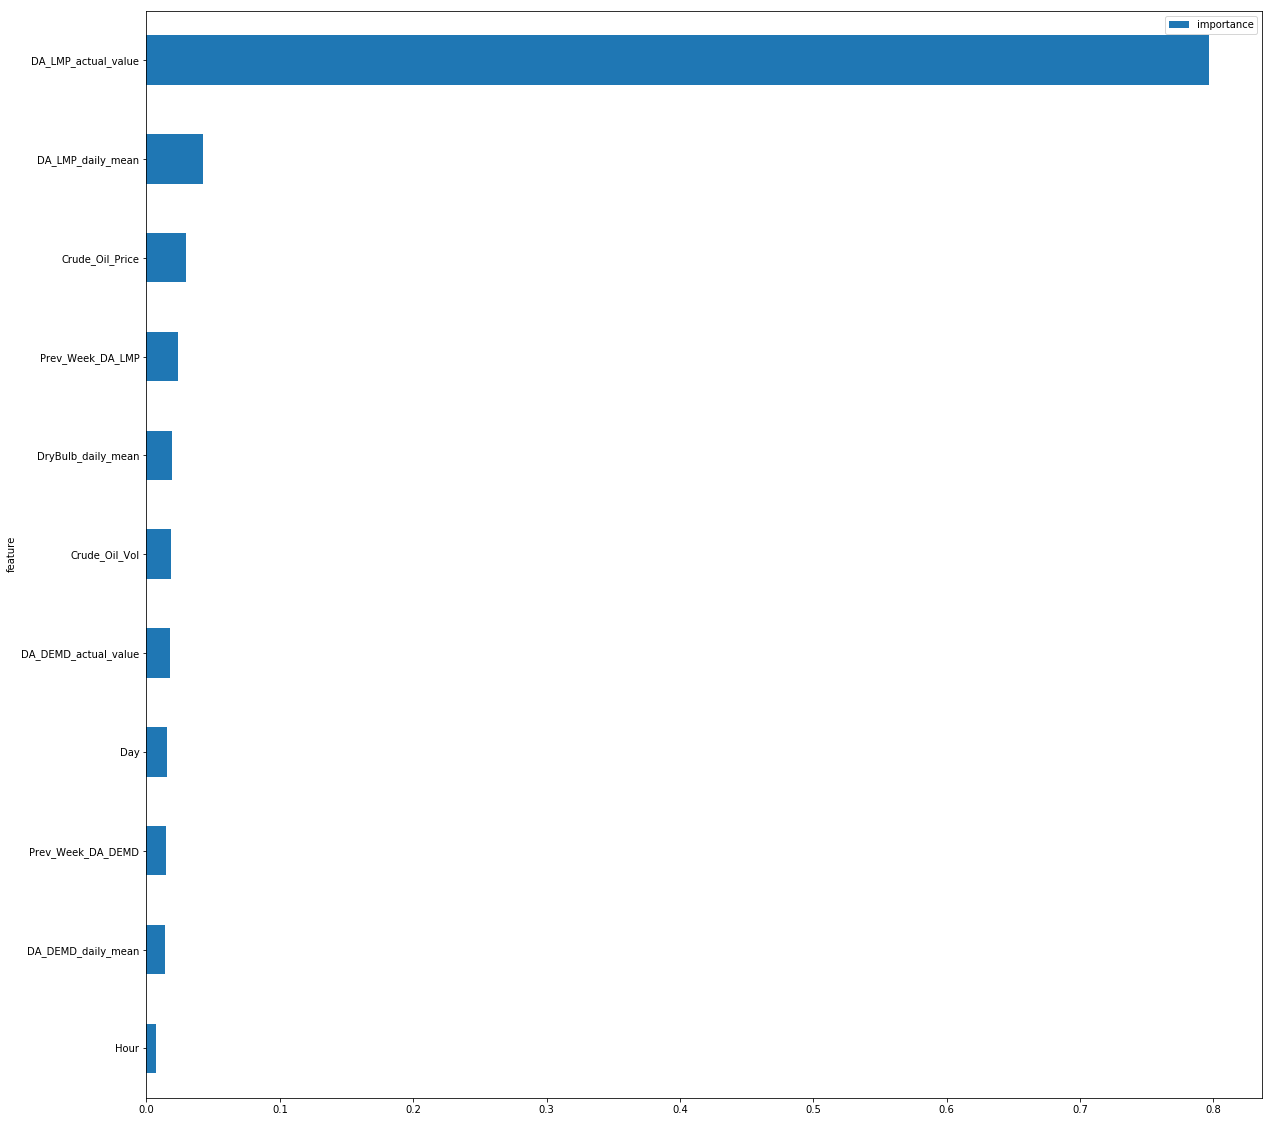

In [39]:
features = pd.DataFrame()
features['feature'] = train_x.columns
features['importance'] = rf_reg.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(20, 20))

#### Demand Prediction MLP

In [742]:
params = {
    'hidden_layer_sizes': [(30,8)],
    'activation': ['relu'],
    'solver': ['lbfgs'],
    'max_iter': [140], #np.linspace(40,100,60, dtype=int)
}

mlp_reg = GridSearchCV(MLPRegressor(learning_rate='adaptive', verbose=1), params, cv=7, n_jobs=-1)
#mlp_reg = MLPRegressor(hidden_layer_sizes=(15,10,3), activation='relu', verbose=1, max_iter=55, solver='lbfgs')
mlp_reg = mlp_reg.fit(train_x_scaled, train_y_scaled)

/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/sklearn/neural_network/mult

In [744]:
print(mlp_reg.best_params_)
print("\n")
print(mlp_reg.best_score_)

{'activation': 'relu', 'hidden_layer_sizes': (30, 8), 'max_iter': 140, 'solver': 'lbfgs'}


0.9116779664639675


In [745]:
mlp_preds = mlp_reg.predict(test_x_scaled)
mlp_preds = std_scaler.inverse_transform(mlp_preds)
mean_absolute_percentage_error(mlp_preds, test_y['TARGET_DA_DEMD'])

3.920980706651943

In [751]:
mlp_preds_train = mlp_reg.predict(train_x_scaled)
mlp_preds_train = std_scaler.inverse_transform(mlp_preds_train)

mlp_preds_test = mlp_reg.predict(test_x_scaled)
mlp_preds_test = std_scaler.inverse_transform(mlp_preds_test)

## PRICE PREDICTIONS

##### random forest

In [33]:
params = {
    'max_depth': np.linspace(50,100,5, dtype=int),
    'n_estimators': np.linspace(500,2000,5, dtype=int),
    'bootstrap': [True]
}

rf_reg = GridSearchCV(RandomForestRegressor(), params, n_jobs=-1, cv=7, scoring='neg_mean_squared_error')
#rf_reg_price = RandomForestRegressor(max_depth=10, n_estimators=500, bootstrap=True)
rf_reg_price = rf_reg.fit(train_x_scaled, train_y_scaled)

NameError: name 'train_y_scaled' is not defined

In [777]:
print(rf_reg_price.best_params_)
print("\n")
print(rf_reg_price.best_score_)

AttributeError: 'RandomForestRegressor' object has no attribute 'best_params_'

#### Training Error

In [41]:
rf_preds_price = rf_reg_price.predict(train_x_scaled)
rf_preds_price = std_scaler.inverse_transform(rf_preds_price)
mean_absolute_percentage_error(rf_preds_price, train_y['TARGET_DA_LMP'])

10.41536045197801

#### Test Error

In [50]:
rf_preds_price = rf_reg_price.predict(test_x_scaled)
rf_preds_price = std_scaler.inverse_transform(rf_preds_price)

In [58]:
print("Jan: ", mean_absolute_percentage_error(rf_preds_price[0:192], test_y['TARGET_DA_LMP'][:192]))
print("Feb: ", mean_absolute_percentage_error(rf_preds_price[192:192+120], test_y['TARGET_DA_LMP'][192:192+120]))
print("March: ", mean_absolute_percentage_error(rf_preds_price[192+120:192+120+192], 
                                                test_y['TARGET_DA_LMP'][192+120:192+120+192]))
print("April: ", mean_absolute_percentage_error(rf_preds_price[192+120+192:192+120+192+168], 
                                                test_y['TARGET_DA_LMP'][192+120+192:192+120+192+168]))
print("May: ", mean_absolute_percentage_error(rf_preds_price[192+120+192+168:192+120+192+168+192], 
                                                test_y['TARGET_DA_LMP'][192+120+192+168:192+120+192+168+192]))
print("June: ", mean_absolute_percentage_error(rf_preds_price[192+120+192+168+192:192+120+192+168+192+168], 
                                                test_y['TARGET_DA_LMP'][192+120+192+168+192:192+120+192+168+192+168]))
print("June: ", mean_absolute_percentage_error(rf_preds_price[192+120+192+168+192+168:192+120+192+168+192+168+192], 
                                test_y['TARGET_DA_LMP'][192+120+192+168+192+168:192+120+192+168+192+168+192]))

Jan:  9.195532266446092
Feb:  10.592487715624598
March:  15.430026758752591
April:  13.131775730968176
May:  14.059325018458631
June:  19.454717737316045
June:  12.114604446539357


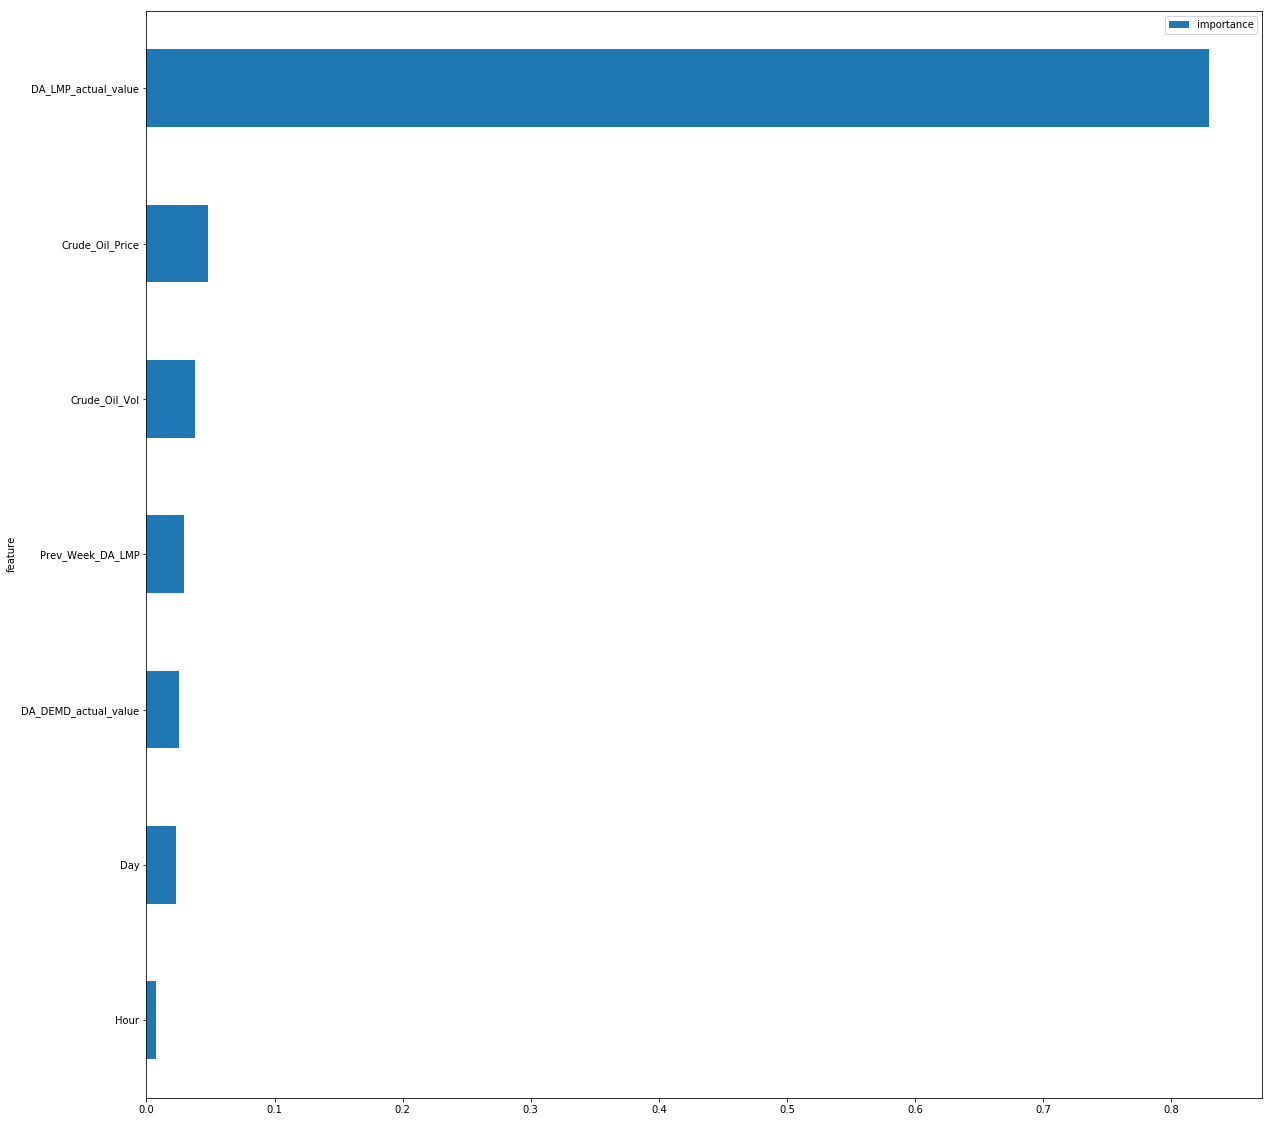

In [37]:
features = pd.DataFrame()
features['feature'] = train_x.columns
features['importance'] = rf_reg_price.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(20, 20))

#### RVM Regressor

In [173]:
rvm_reg = RVR(coef0=0.01, kernel='poly', degree=2, n_iter=400, tol=1e-5, verbose=True, gamma=0.001)
rvm_reg = rvm_reg.fit(train_x_scaled, train_y_scaled)

/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 0, number of features in the model: 2
Iteration: 1, number of features in the model: 3
Iteration: 2, number of features in the model: 4
Iteration: 3, number of features in the model: 5
Iteration: 4, number of features in the model: 6
Iteration: 5, number of features in the model: 7
Iteration: 6, number of features in the model: 8
Iteration: 7, number of features in the model: 9
Iteration: 8, number of features in the model: 10
Iteration: 9, number of features in the model: 10
Iteration: 10, number of features in the model: 11
Iteration: 11, number of features in the model: 12
Iteration: 12, number of features in the model: 12
Iteration: 13, number of features in the model: 13
Iteration: 14, number of features in the model: 14
Iteration: 15, number of features in the model: 14
Iteration: 16, number of features in the model: 15
Iteration: 17, number of features in the model: 16
Iteration: 18, number of features in the model: 17
Iteration: 19, number of features in the model: 1

In [174]:
rvm_preds = rvm_reg.predict(test_x_scaled)
rvm_preds = std_scaler.inverse_transform(rvm_preds)
mean_absolute_percentage_error(rvm_preds, test_y['TARGET_DA_LMP'])

19.75505944025538

In [175]:
from sklearn.metrics import mean_absolute_error
#print("Jan: ", mean_absolute_percentage_error(rvm_preds[0:192], test_y['TARGET_DA_LMP'][0:192]))
days_list = [0,8,5,8,7,8,7,8,8,7,8,7,8,8,5,8,7,8,7,8,8,7,8,7,8]
temp_list =[]
for i in range(0,len(days_list)-1):
    #print(int(np.sum(days_list[:i+1])),int(np.sum(days_list[:i+2])))
    temp_list.append(mean_absolute_error(
        rvm_preds[int(np.sum(days_list[:i+1]))*24:int(np.sum(days_list[:i+2]))*24], 
                            test_y['TARGET_DA_LMP'][int(np.sum(days_list[:i+1]))*24:int(np.sum(days_list[:i+2]))*24]))

In [176]:
temp_list

[3.5378706819451202,
 3.288549988062051,
 5.7145289759315423,
 5.2473920257781241,
 4.4909000363917686,
 11.378874765573382,
 7.1607567082309087,
 7.1470564283869225,
 3.8511288076288017,
 5.8323135960845578,
 12.357580573277861,
 13.808593550103181,
 40.336163259208973,
 8.4978964312682432,
 10.338443923915843,
 6.1060691978717454,
 9.1056082335554915,
 8.4573740003685369,
 8.3946822590084977,
 5.1343438363074512,
 2.7950451775061471,
 3.0089363816052028,
 17.564625559845599,
 22.177615937941077]

In [376]:
test_x['abcdef'] = test_y['TARGET_DA_LMP']

/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [377]:
test_x[125:150]

Hour  DA_DEMD  DA_LMP  DryBulb  DewPnt  Day  Prev_Week_DA_LMP  abcdef
125     6  10555.0   27.03       34      14    1             34.96   30.96
126     7  11298.0   27.25       33      13    1             37.86   31.68
127     8  11767.0   27.19       32      13    1             39.04   35.67
128     9  12780.0   28.00       33      13    1             39.08   33.86
129    10  13300.0   29.35       34      13    1             39.22   36.09
130    11  13492.0   31.12       36      13    1             43.19   36.03
131    12  13646.0   29.76       37      12    1             40.14   35.61
132    13  13391.0   29.24       38      12    1             39.08   33.01
133    14  13226.0   28.57       39      12    1             37.97   32.26
134    15  13137.0   28.00       40      13    1             37.77   31.84
135    16  13242.0   28.82       40      13    1             36.83   32.30
136    17  14460.0   30.03       40      13    1             39.18   38.89
137    18  15986.0   43.51       38      14    1             62.75   63.91
138    19  15592.0   37.11       36      15    1             47.86   55.00
139    20  15317.0   37.15       36      16    1             37.62   44.83
140    21  14684.0   36.43       34      17    1             37.60   39.39
141    22  13876.0   31.75       34      17    1             35.89   36.54
142    23  12757.0   29.02       33      18    1             36.01   29.58
143    24  11688.0   27.61       33      18    1             33.94   30.00
144     1  11062.0   25.34       32      18    2             26.78   28.18
145     2  10983.0   23.33       32      19    2             25.21   27.44
146     3  10767.0   22.12       32      19    2             25.07   25.29
147     4  10786.0   21.99       33      19    2             24.80   25.15
148     5  10923.0   24.00       34      20    2             25.30   27.53
149     6  11731.0   30.96       34      20    2             28.24   28.23

In [359]:
temp = std_scaler.fit_transform(test_x[:192])

### Plot True vs Predicted Values

In [125]:
test['DA_LMP_actual_value'][:96]

0     26.78
1     25.21
2     25.07
3     24.80
4     25.30
5     28.24
6     30.12
7     30.90
8     30.71
9     31.16
10    31.07
11    30.05
12    29.94
13    28.00
14    27.68
15    29.74
16    31.25
17    51.66
18    37.51
19    35.11
20    30.70
21    30.09
22    30.00
23    28.16
24    28.07
25    25.32
26    25.29
27    25.13
28    26.33
29    29.30
      ...  
66    38.88
67    35.78
68    33.42
69    31.88
70    30.40
71    30.44
72    26.96
73    25.16
74    22.84
75    22.82
76    23.26
77    26.52
78    29.85
79    31.65
80    34.81
81    35.65
82    35.64
83    34.89
84    32.63
85    30.89
86    29.55
87    29.30
88    35.16
89    41.16
90    37.59
91    31.10
92    29.36
93    28.59
94    27.77
95    27.74
Name: DA_LMP_actual_value, Length: 96, dtype: float64

In [155]:
std_sc = StandardScaler()

temp_x = train[['Prev_Week_DA_LMP ']]
temp_scaled = pd.DataFrame(std_sc.fit_transform(temp_x))

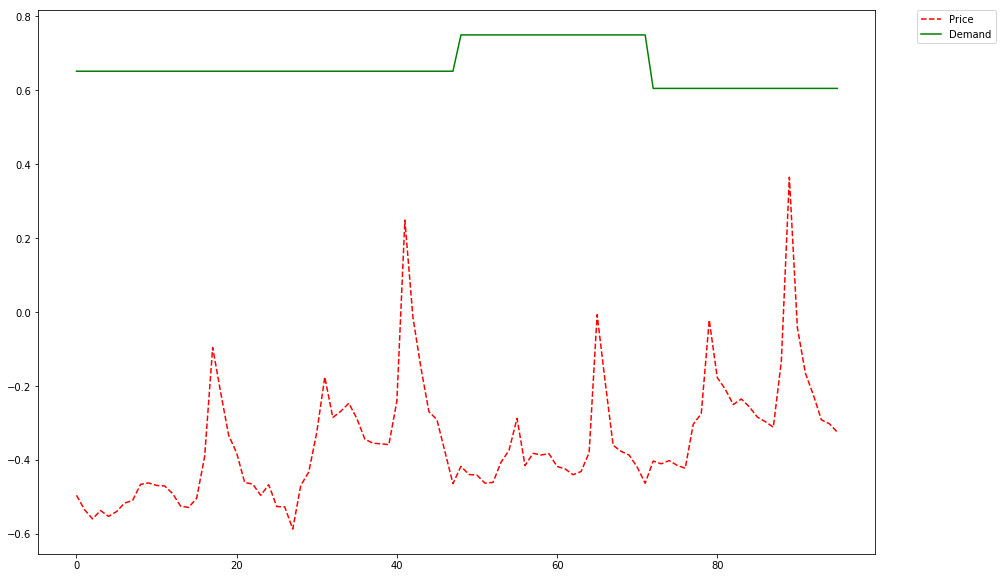

In [157]:
#import matplotlib.pyplot as plt
temp = pd.DataFrame({
    'price':temp_scaled[1][0:96],
    'demand':temp_scaled[0][0:96]
})
temp = temp.reset_index(drop=True)
plt.plot(temp['price'], 'r--', label="Price")
plt.plot(temp['demand'], 'g-', label="Demand")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
train_x

In [139]:
test_x_scaled

array([[-1.66132477, -0.94895152, -0.49786174, ...,  0.41034066,
         0.35213208, -1.44207665],
       [-1.51686175, -1.03871233, -0.52701267, ...,  0.41034066,
         0.35213208, -1.44207665],
       [-1.37239873, -1.08359274, -0.52961212, ...,  0.41034066,
         0.35213208, -1.44207665],
       ..., 
       [ 1.37239873,  0.8083485 ,  0.53727486, ..., -3.78424519,
         0.02254791, -0.71159475],
       [ 1.51686175,  0.34368154,  0.40767391, ..., -3.78424519,
         0.02254791, -0.71159475],
       [ 1.66132477, -0.14226492,  0.12024943, ..., -3.78424519,
         0.02254791, -0.71159475]])